In [1]:
from funtions import *

# VIF Test

Run variance inflation factor test to determine colinearity between features.

In [2]:
# Get dataframe
census_df = pd.read_csv('../data/census.csv')

print(census_df.columns)

Index(['Tract', 'Income', 'Population', 'Population Density',
       'Unemployment (%)', 'Under 18 Population', 'Under 5 Population',
       'Non-White (%)', 'School Enrollment', 'Non-Hispanic and Non-Black (%)',
       'Highschool Graduate (%)', 'Poverty Rate (%)', 'Owner Occupied',
       'Renter Occupied', 'Owner Occupied (%)', 'Renter Occupied (%)'],
      dtype='object')


In [3]:
# Run VIF for all features
df_vif_all = census_df.drop(columns='Tract')
vif_all = pd.DataFrame({
    'Predictor': df_vif_all.columns,
    'VIF': [
        variance_inflation_factor(df_vif_all.values, i)
        for i in range(df_vif_all.shape[1])
    ]
})

print(vif_all)

                         Predictor         VIF
0                           Income   16.587751
1                       Population  209.913830
2               Population Density    3.446863
3                 Unemployment (%)    5.052080
4              Under 18 Population  627.084254
5               Under 5 Population   72.539738
6                    Non-White (%)    6.114203
7                School Enrollment  340.946684
8   Non-Hispanic and Non-Black (%)   12.966885
9          Highschool Graduate (%)   21.216615
10                Poverty Rate (%)    8.330564
11                  Owner Occupied   54.555812
12                 Renter Occupied   22.280595
13              Owner Occupied (%)   32.967852
14             Renter Occupied (%)   31.330080


In [4]:
# Run VIF for chosen subset of features
subset = df_vif_all[['Population', 'Population Density', 'Income',
                     'Unemployment (%)', 'Non-White (%)', 'Poverty Rate (%)']]

vif_reduced = pd.DataFrame({
    'Predictor': subset.columns,
    'VIF': [
        variance_inflation_factor(subset.values, i)
        for i in range(subset.shape[1])
    ]
})

print(vif_reduced)

            Predictor       VIF
0          Population  3.375044
1  Population Density  2.672335
2              Income  2.674918
3    Unemployment (%)  4.254526
4       Non-White (%)  4.848944
5    Poverty Rate (%)  3.933476


# Choropleths

In [5]:
# Set up geopandas dataframe with attributes and shapefiles
attribute_df = pd.read_csv('../data/census.csv')
gdf = get_gdf(attribute_df=attribute_df, shapefiles='../data/shape_files', omit_tracts=['980000'])
gdf.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry',
       'Income', 'Population', 'Population Density', 'Unemployment (%)',
       'Under 18 Population', 'Under 5 Population', 'Non-White (%)',
       'School Enrollment', 'Non-Hispanic and Non-Black (%)',
       'Highschool Graduate (%)', 'Poverty Rate (%)', 'Owner Occupied',
       'Renter Occupied', 'Owner Occupied (%)', 'Renter Occupied (%)'],
      dtype='object')

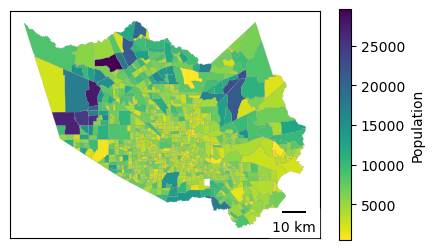

In [6]:
# Plot choropleth
attribute = 'Population'
fig, ax = plt.subplots(1, 1, figsize=(5,5))
plot_cloropleth(gdf, attribute, axis=ax, scalebar=True, cmap=plt.cm.viridis_r)